
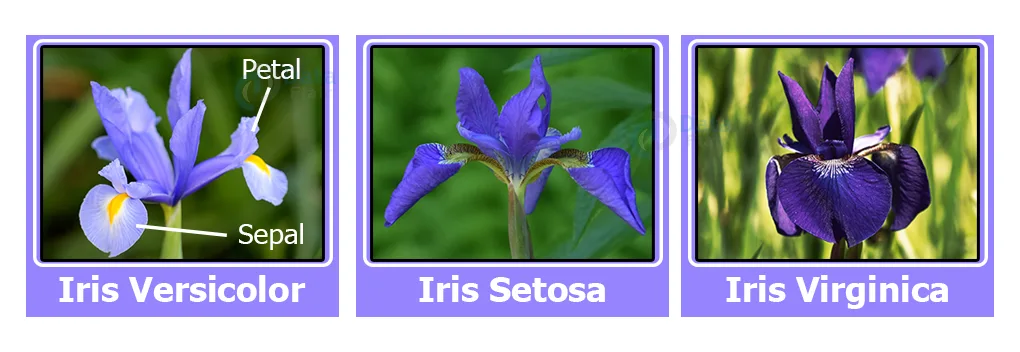


## Steps to Classify Iris Flower:
1. Load the data
2. Analyze and visualize the dataset
3. Model training.
4. Model Evaluation.
5. Testing the model.

### Step 1: Load the data

In [25]:
# Iris Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

- We load the data using pd.read_csv() and set the column name as per the iris data information.

In [9]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] # As per the iris dataset information

In [10]:
# Load the data
df = pd.read_csv('iris.data', names=columns)

In [11]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2: Analyze and vizualise the dataset.

In [26]:
# Some basic statistical analysis about the data
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see all the descriptions about the data, like average length and width, minimum value, maximum value, the 25%, 50%, and 75% distribution value, etc.

In [27]:
# ?sns.pairplot

To visualize the whole dataset we used the seaborn pair plot method. It plots the whole dataset’s information.

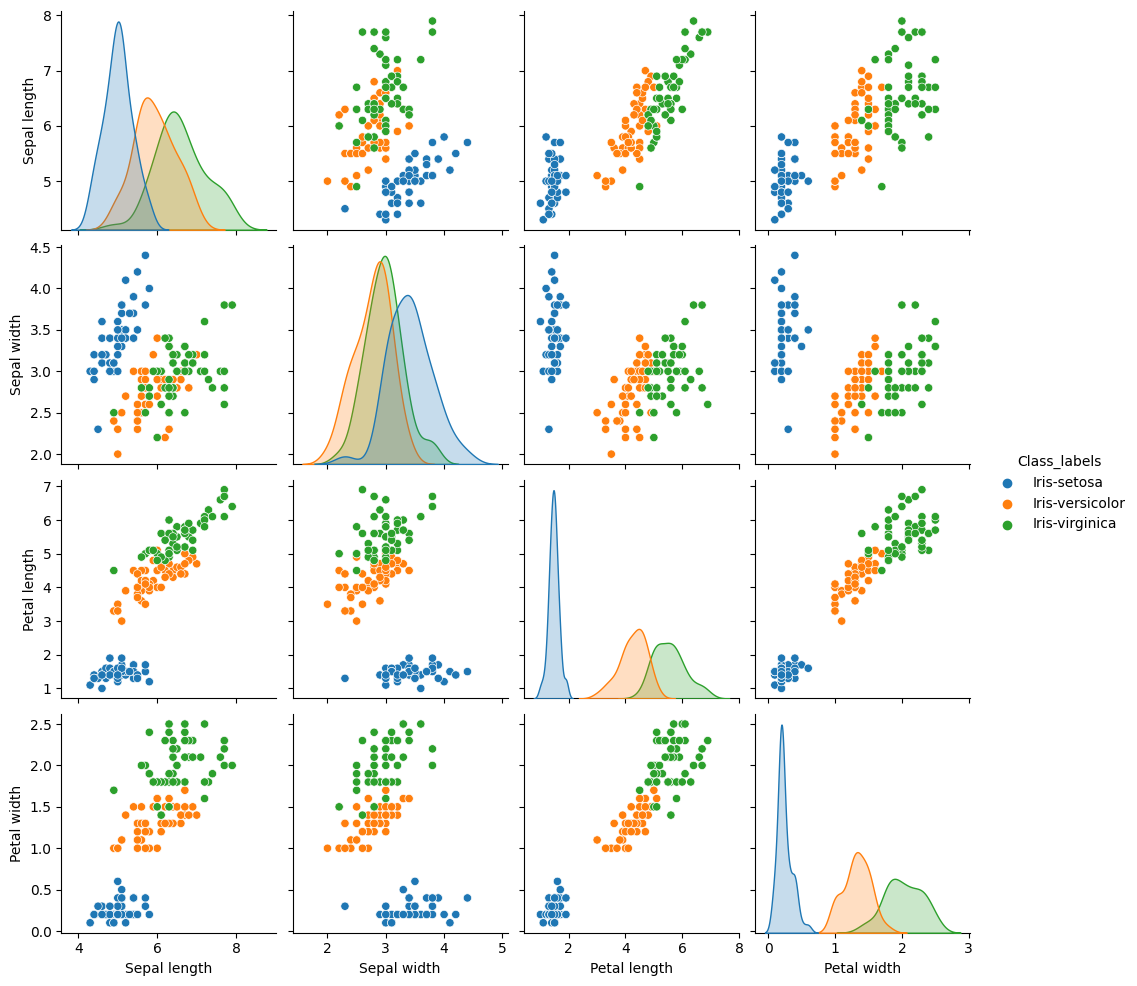

In [14]:
# Visualize the whole dataset
sns.pairplot(df, hue='Class_labels')

- From this visualization, we can tell that iris-setosa is well separated from the other two flowers.
- And iris virginica is the longest flower and iris setosa is the shortest.

In [37]:
# Seperate features and target  
data = df.values
X = data[:,0:4]
Y = data[:,4]
X=pd.DataFrame(X)
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
# Calculate avarage of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
print("1d Array : \n",Y_Data)
Y_Data_reshaped = Y_Data.reshape(4, 3)
print("\nAfter reshaping to (4,3): \n",Y_Data_reshaped)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
print("\n Changing the Axes\n",Y_Data_reshaped)
X_axis = np.arange(len(columns)-1)
width = 0.25

1d Array : 
 [5.006     5.9360003 6.5880003 3.418     2.7700002 2.974     1.4640001
 4.26      5.552     0.244     1.3260001 2.026    ]

After reshaping to (4,3): 
 [[5.006     5.9360003 6.5880003]
 [3.418     2.7700002 2.974    ]
 [1.4640001 4.26      5.552    ]
 [0.244     1.3260001 2.026    ]]

 Changing the Axes
 [[5.006     3.418     1.4640001 0.244    ]
 [5.9360003 2.7700002 4.26      1.3260001]
 [6.5880003 2.974     5.552     2.026    ]]


- Np.average calculates the average from an array using List Comprehension.
- The Y_Data is a 1D array, but we have 4 features for every 3 classes. So we reshaped Y_Data to a (4, 3) shaped array.
- Then we change the axis of the reshaped matrix.

We use matplotlib to show the averages in a bar plot.

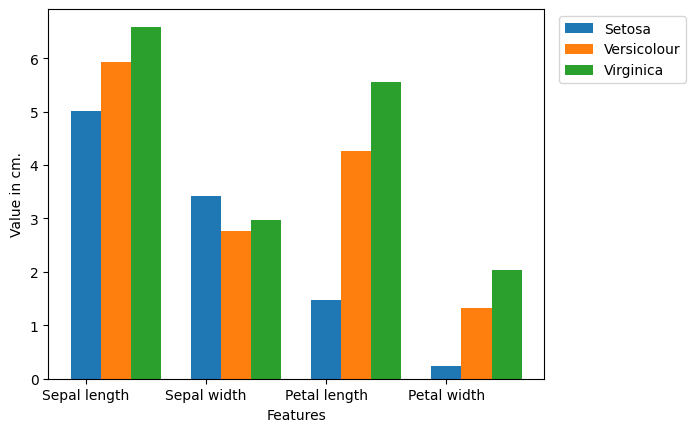

In [18]:
# Plot the avarage
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

Here we can clearly see the <b>verginica</b> is the longest and <b>setosa</b> is the shortest flower.

### Step 3: Model Training.
- Using train_test_split we split the whole data into training and testing datasets. 
- Later we’ll use the testing dataset to check the accuracy of the model.

In [19]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

- Here we imported a support vector classifier from the scikit-learn support vector machine.
- Then, we created an object and named it svn.
- After that, we feed the training dataset into the algorithm by using the svn.fit() method.

### Step 4: Model Evaluation

- Now we predict the classes from the test dataset using our trained model.
- Then we check the accuracy score of the predicted classes.
- accuracy_score() takes true values and predicted values and returns the percentage of accuracy.

In [46]:
# Predict from the test dataset
predictions = svn.predict(X_test)

In [51]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test, predictions)*100,2),'%')

96.67 %


The accuracy is above 96%.

In [52]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 9,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  8]], dtype=int64)

In [23]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



- The classification report gives a detailed report of the prediction.
- Precision defines the ratio of true positives to the sum of true positive and false positives.
- Recall defines the ratio of true positive to the sum of true positive and false negative.
- F1-score is the mean of precision and recall value.
- Support is the number of actual occurrences of the class in the specified dataset.

### Step 5: Testing the model.
Here we take some random values based on the average plot to see if the model can predict accurately.

In [24]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


In [42]:
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

It looks like the model is predicting correctly because the setosa is shortest and virginica is the longest and versicolor is in between these two.

## Summary:
- In this project, we learned to train our own supervised machine learning model using 
Iris Flower Classification Project with Machine Learning. 
- Through this project, we learned about machine learning, data analysis, data visualization, model creation, etc.